<h1>Buisness and Data Understanding</h1>
<p>I am going to use <a href="https://insights.stackoverflow.com/survey">Stackoverflow Developer Survey Dataset of year 2020</a> to answer questions given below</p>
<h5>Buisness Questions</h5>
<h6> Q1 : What factors are considered by people when looking for job?</h6>
<h6> Q2 : Does employees with high compensation are satisfied with their jobs? What are their views on Factors to consider while looking for jobs?</h6>
<h6> Q3 : Those people who are actively looking for job what drives them to look for new job?</h6>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_public = pd.read_csv('./stack-overflow-survey-2020/survey_results_public.csv')
df_schema = pd.read_csv('./stack-overflow-survey-2020/survey_results_schema.csv')

<h5>Data Understanding</h5>

In [2]:
df_public.head() #Quick look at dataset

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [12]:
df_schema.head() #quick look at schema which defines column in df_public

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


**Size of Dataset**

In [5]:
df_public.shape #number of rows and columns in dataset

(64461, 61)

In [176]:
df_public.describe() #this shows range of float/int columns and some extra information

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


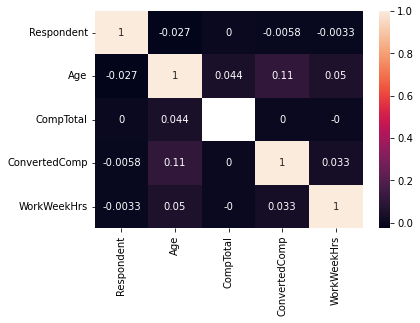

In [185]:
df_public.corr().plot
sns.heatmap(df_public.corr(),annot = True);

In [7]:
df_public.info() #provides summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

From quick look of above table following columns are selected at random

**A Look Into JobFactors Column**

In [19]:
list(df_schema[df_schema.Column == 'JobFactors'].QuestionText)[0]

'Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?'

In [192]:
df_public[df_public.JobFactors.notnull()].JobFactors

0        Languages, frameworks, and other technologies ...
3        Flex time or a flexible schedule;Office enviro...
5        Diversity of the company or organization;Langu...
7        Remote work options;Opportunities for professi...
8        Diversity of the company or organization;Remot...
                               ...                        
64146    Specific department or team I’d be working on;...
64148    Industry that I’d be working in;Languages, fra...
64150    Flex time or a flexible schedule;Languages, fr...
64152    Flex time or a flexible schedule;Languages, fr...
64153    Languages, frameworks, and other technologies ...
Name: JobFactors, Length: 49349, dtype: object

In [170]:
print("Percentage of Null Values in JobFactors Column : ",df_public.JobFactors.isnull().mean())

Percentage of Null Values in JobFactors Column :  0.23443632584043064


**A Look Into ConvertedComp Column**

In [165]:
list(df_schema[df_schema.Column == 'ConvertedComp'].QuestionText)[0]

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

In [168]:
print("Percentage of Null Values in ConvertedComp Column : ",df_public.ConvertedComp.isnull().mean())

Percentage of Null Values in ConvertedComp Column :  0.4608212717767332


In [190]:
df_public[df_public.ConvertedComp.notnull()].ConvertedComp

7        116000.0
9         32315.0
10        40070.0
11        14268.0
12        38916.0
           ...   
64142       984.0
64148     19428.0
64152       200.0
64153     15048.0
64154     38759.0
Name: ConvertedComp, Length: 34756, dtype: float64

**A Look Into JobSat Column**

In [193]:
list(df_schema[df_schema.Column == 'JobSat'].QuestionText)[0]

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

Very satisfied                        0.226664
Slightly satisfied                    0.216100
Slightly dissatisfied                 0.110516
Neither satisfied nor dissatisfied    0.089713
Very dissatisfied                     0.058113
Name: JobSat, dtype: float64


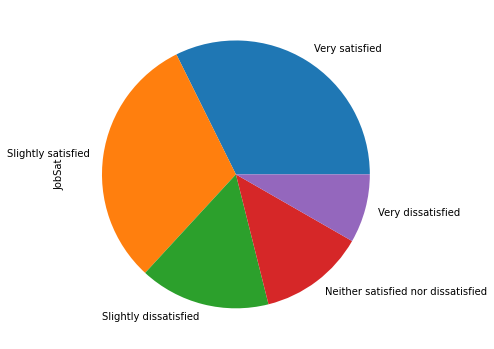

In [198]:
print(df_public.JobSat.value_counts()/df_public.shape[0]) #including null values
(df_public.JobSat.value_counts()/df_public.JobSat.value_counts().sum()).plot.pie(figsize = (6,8)); #excluding null values

In [196]:
print("Percentage of Null Values in JobSat Column : ",df_public.JobSat.isnull().mean())

Percentage of Null Values in JobSat Column :  0.2988939048416872


**A Look Into JobSeek Column**

In [199]:
list(df_schema[df_schema.Column == "JobSeek"].QuestionText)

['Which of the following best describes your current job-seeking status?']

In [200]:
print("Percentage of Null values in JobSeek :",df_public.JobSeek.isnull().mean())

Percentage of Null values in JobSeek : 0.1975458028885683


I’m not actively looking, but I am open to new opportunities    0.575637
I am not interested in new job opportunities                    0.251339
I am actively looking for a job                                 0.173024
Name: JobSeek, dtype: float64


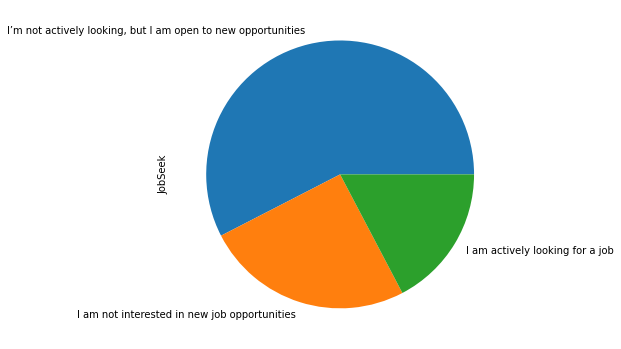

In [201]:
print(df_public.JobSeek.value_counts()/df_public.JobSeek.value_counts().sum())
df_public.JobSeek.value_counts().plot.pie(figsize = (6,8));

**A Look Into NEWJobHunt Column**

In [202]:
list(df_schema[df_schema.Column == "NEWJobHunt"].QuestionText)

['In general, what drives you to look for a new job? Select all that apply.']

In [203]:
print("Percentage of Null values in NEWJobHunt :",df_public.NEWJobHunt.isnull().mean())

Percentage of Null values in NEWJobHunt : 0.3440064535145282


In [206]:
df_public.NEWJobHunt.value_counts()[:10]

Curious about other opportunities;Better compensation;Wanting to work with new technologies;Growth or leadership opportunities                                                 1127
Curious about other opportunities;Better compensation;Better work/life balance;Wanting to work with new technologies;Growth or leadership opportunities                        1121
Better compensation                                                                                                                                                             803
Curious about other opportunities;Better compensation;Wanting to work with new technologies                                                                                     717
Better compensation;Better work/life balance;Wanting to work with new technologies;Growth or leadership opportunities                                                           662
Curious about other opportunities;Better compensation;Better work/life balance;Wanting to work with 

<h1>Prepare Data</h1>

To answer question 'Q1' I have concluded that I only need JobFactors column

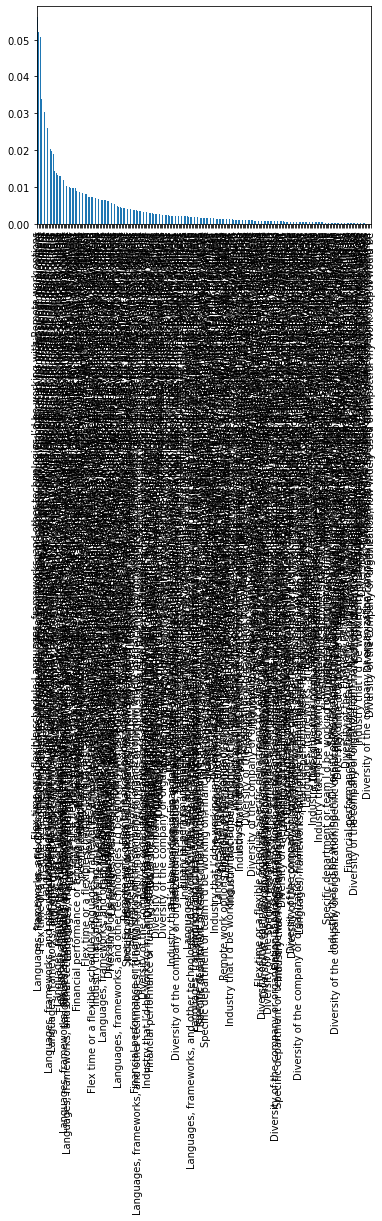

In [207]:
jobfactors = df_public.JobFactors
jobfactors = jobfactors.dropna()
(jobfactors.value_counts()/jobfactors.shape[0]).plot(kind = 'bar');

This won't do. We have to find unique values from JobFactors column and their frequencies. I have decided to use unique values as it makes more sense and also there is very large amount of variations in value range of JobFactors and this range of values is also redundant.

In [4]:
def unique_values_column(df_col):
    """
        unique_values_column function : This function is used to obtain unique values from column's of dtype-'object' with multiple
        values in single row
    
        INPUT : 
            column of dataframe with object dtype
        OUTPUT : 
            dataframe containing unique values of the column and its value counts
    """
    vals = {}
    unique_vals = []
    for val in df_col:
        while ';' in val:
            loc = val.find(';')
            str_val = val[:loc]
            val = val[loc+1:]
            if str_val not in vals:
                unique_vals.append(str_val)
                vals[str_val] = 1
            else:
                vals[str_val] = vals[str_val] + 1
        if val not in vals:
            unique_vals.append(val)
            vals[val] = 1
        else:
            vals[val] = vals[val] + 1
    
    return pd.DataFrame.from_dict(vals, orient='index', columns = ['counts']), unique_vals

In [232]:
jobfacs, unique_facs = unique_values_column(jobfactors) #obtaining unique values with their value counts

**In order to answer second question I have found that JobSat, JobFactors and ConvertedComp columns are best. This conclusion is made after having a quick look at the type of dataset and their values.**

In [234]:
q2_dataset = df_public[["JobSat","ConvertedComp"]]
q2_dataset = q2_dataset.dropna(subset = ["ConvertedComp"],axis = 0) #result of following operations is shown is Evaluatuon section Q2 part

In [209]:
q2_dataset_2 = df_public[["JobFactors","ConvertedComp"]]
q2_dataset_2 = q2_dataset_2.dropna(subset=["ConvertedComp"],axis = 0) #result of this operation is shown in Evaluation Q2 part

In [236]:
groupby_jobfacs = q2_dataset_2.groupby(["JobFactors"]).mean()["ConvertedComp"] #result of this operation is shown is Eval Q2 part

In [215]:
jobseek_active = df_public[df_public["JobSeek"].isin(["I’m not actively looking, but I am open to new opportunities","I am actively looking for a job"])]
print(jobseek_active.JobSeek.value_counts())

I’m not actively looking, but I am open to new opportunities    29776
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64


In [216]:
#result of this operation is shown in Evaluation section Q3 part
jobseek_active_jobhunt, unique_jobhunt_criterion = unique_values_column(jobseek_active.dropna(subset=["NEWJobHunt"]).NEWJobHunt)

In [72]:
def convert_to_column(df, cols,col_name):
    """
        Convert unique column values(from complex values as in JobFactors column) into column with values 0-false/1-true
        INPUT:
            df - Dataframe
            cols - unique values of col_name
            col_name - main column refrencing which cols will be created
        OUTPUT : 
            df - Dataframe with new cols added and their values imputed
    """
    #create dummy vars
    for col in cols:
        df[col] = 0
    #impute value in those vars
    for col in cols:
        for val in df.iterrows():
            if type(val[1][col_name]) != "<class 'float'>":
                try:
                    if col in val[1][col_name]:
                        df[col][val[0]] = 1
                except:
                    pass
            else:
                pass
    
    return df

<h1>Evaluation</h1>

<h3> Q1 : What factors are considered by people when looking for job?</h3>

<AxesSubplot:>

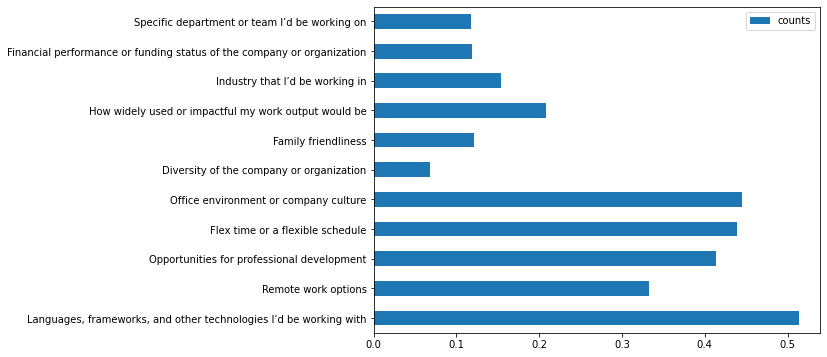

In [259]:
#print("Number of Unique Factors:",len(unique_facs),'\n',jobfacs/jobfactors.shape[0])
display((jobfacs/jobfactors.shape[0]).plot.barh(figsize = (8,6))) #graph

*According to the bar plotted above, there are 11 unique factors considered while deciding between two jobs. Individual's consider multiple factors too, like 'Remote work option, Flexible schedule' and many more. <br>
Among all factors top considered factors are:<br>
-> 'Languages, frameworks, and other technologies I’d be working with': most considered, with 51.3% considerations<br>
-> 'Office environment or company culture': second most considered, with 44.5% considerations and rest follows in decreasing percentage<br>
-> 'Flex time or a flexible schedule' : with 43.8%<br>
-> 'Opportunities for professional development' : with 41.3%<br>
-> 'Remote work options' : with 33%<br>
Among all factors least considered factor is 'Diversity of the company or organization'.<br>*



<h3>Q2: Are employees with high compensation satisfied with their jobs? What are their views on Factors to consider while looking for jobs?</h3>

**Part 1 of Question: Are employees with high compensation satisfied with their jobs**

                                    ConvertedComp
JobSat                                           
Neither satisfied nor dissatisfied   91748.645352
Slightly dissatisfied                95691.666029
Slightly satisfied                   97914.980343
Very dissatisfied                    98499.218481
Very satisfied                      119251.118370


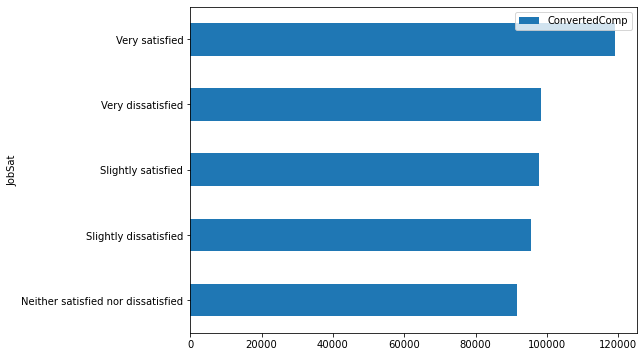

In [249]:
print(q2_dataset.groupby(["JobSat"]).mean())
(q2_dataset.groupby(["JobSat"]).mean()).plot.barh(figsize = (8,6)); #graph

*Employees with higher salary are very satisfied their job. According to above graph employees with average salary of 119,251$ are most satisfied with their jobs.*

**Part 2 of Question: What are their views on Factors to consider while looking for jobs?**

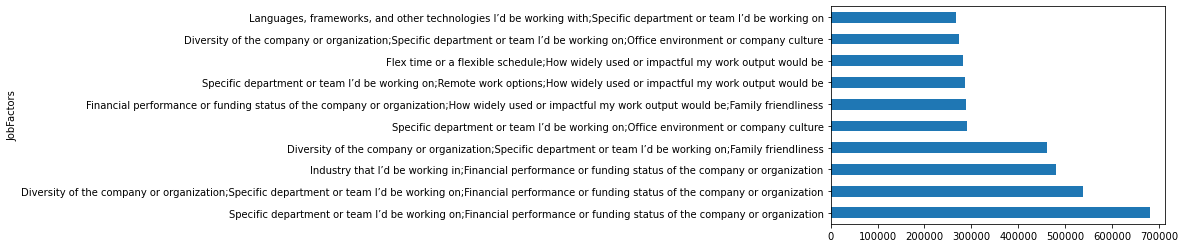

In [250]:
groupby_jobfacs.sort_values(ascending=False)[:10].plot(kind = 'barh'); #graph

*Employees with high salary consider -the department or team they would be working on, Financial standings of company; important factors to take into consideration.*

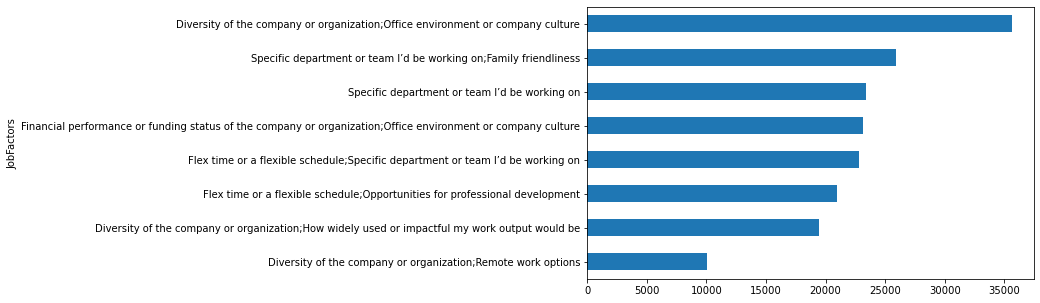

In [238]:
groupby_jobfacs.sort_values(ascending=True)[:8].plot.barh(figsize = (8,5)); #graph

<h3>Q3 : Those people who are actively looking for job what drives them to look for new job?</h3>

                                                    counts
Curious about other opportunities                    19134
Wanting to work with new technologies                19267
Better compensation                                  22952
Growth or leadership opportunities                   17268
Trouble with my direct manager                        4403
Trouble with leadership at my company                 7673
Better work/life balance                             15123
Looking to relocate                                   8363
Wanting to share accomplishments with a wider n...    3808
Having a bad day (or week or month) at work           6830
Trouble with my teammates                             3003
Just because                                          4295


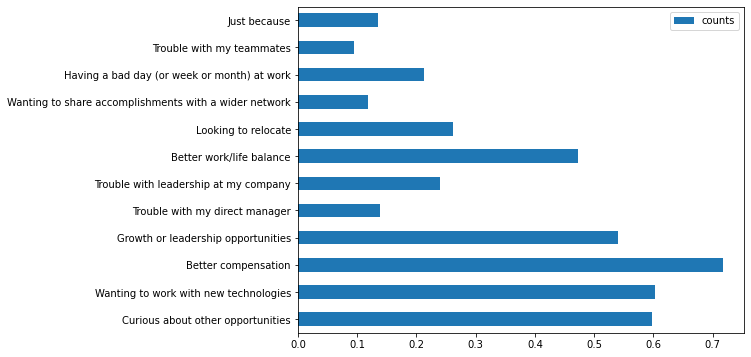

In [239]:
print(jobseek_active_jobhunt)
(jobseek_active_jobhunt/jobseek_active.dropna(subset=["NEWJobHunt"]).shape[0]).plot.barh(figsize = (8,6));

*Here it is concluded that people often switch jobs for better compensations*

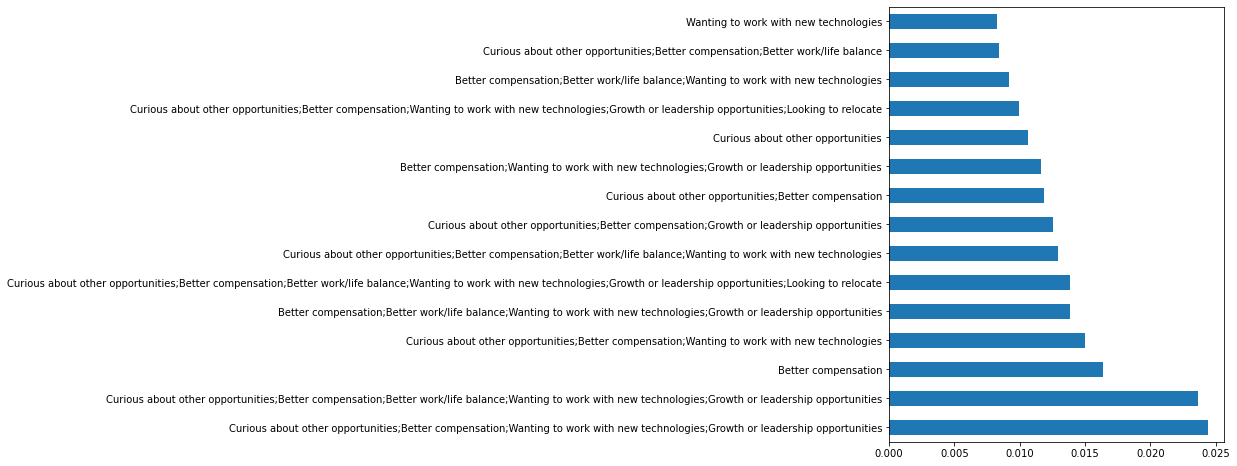

In [262]:
(jobseek_active.NEWJobHunt.value_counts().sort_values(ascending=False)[:15]/jobseek_active.shape[0]).plot.barh(figsize = (6,8));

*From above analysis following can be considered the reason for continuous job change: <br>
-> Curious about new opportunities <br>
-> Better compensations <br>
-> Their overall growth as an individual and leader <br>
-> Urge to learn and work with new technologies*